# Slice Sampling

In [8]:
import numpy as np
import math
from matplotlib import pyplot as plt
from numpy.random import default_rng
rng = default_rng()

In [70]:
# Unnormalised probability distribution we want to sample from
def P(x):
    return math.pow(math.e, -math.pow(math.sin(1/4*x), 2)) * math.pow(1.01,-math.pow(x, 2))  

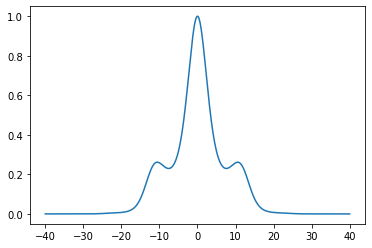

In [71]:
xs = np.linspace(-40,40, num=1000)
ys = np.array(list(map(P, xs)))
plt.plot(xs, ys)

In [74]:
STEP_SIZE = 1

# "Stepping Out" method for creating the interval
def create_interval(x, u):
    r = rng.uniform(0,1)
    x_l = x - r * STEP_SIZE 
    x_r = x + (1 - r) * STEP_SIZE 
    while P(x_l) > u:
        x_l = x_l - STEP_SIZE
        x_r = x_r + STEP_SIZE
    
    return (x_l, x_r)

def modify_interval(x_l, x_r, x, x_new):
    if (x_new > x):
        x_r = x_new
    else:
        x_l = x_new
    return (x_l, x_r)

# Pick some arbitrary starting x:
x = 5
samples = []
for sample in range(200000):
    # Draw a vertical coodinate u ~ U(0, P*(x))
    u = rng.uniform(0, P(x)) 
    # Create horizontal interval (x_l, x_r) enclosing x
    (x_l, x_r) = create_interval(x, u)

    while True:
        x_new = rng.uniform(x_l, x_r)
        value = P(x_new)
        if (value > u):
            break
        else:
            (x_l, x_r) = modify_interval(x_l, x_r, x, x_new)
            
    samples.append(x_new)

(array([1.62645692e-05, 0.00000000e+00, 3.25291385e-05, 0.00000000e+00,
        0.00000000e+00, 1.62645692e-05, 0.00000000e+00, 6.50582769e-05,
        1.62645692e-05, 8.13228462e-05, 4.87937077e-05, 9.75874154e-05,
        8.13228462e-05, 1.13851985e-04, 2.11439400e-04, 1.46381123e-04,
        1.13851985e-04, 1.62645692e-04, 1.46381123e-04, 2.11439400e-04,
        2.92762246e-04, 2.60233108e-04, 2.60233108e-04, 2.43968539e-04,
        2.43968539e-04, 2.76497677e-04, 4.06614231e-04, 6.66847339e-04,
        4.87937077e-04, 5.04201646e-04, 5.52995354e-04, 6.50582769e-04,
        6.34318200e-04, 6.18053631e-04, 6.83111908e-04, 1.02466786e-03,
        1.12225528e-03, 1.02466786e-03, 1.65898606e-03, 1.70777977e-03,
        2.24451055e-03, 2.87882875e-03, 3.44808868e-03, 3.83843834e-03,
        5.09081017e-03, 6.06668433e-03, 7.56302470e-03, 7.93710979e-03,
        1.02466786e-02, 1.22797498e-02, 1.43778792e-02, 1.56627802e-02,
        1.75982639e-02, 2.16806708e-02, 2.12089983e-02, 2.452697

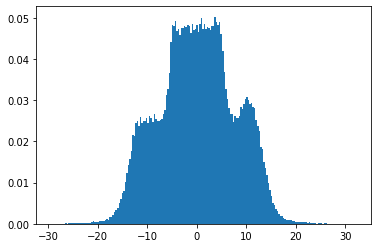

In [76]:
plt.hist(samples, bins=200, density=True)